In [47]:
import tensorflow as tf
from tensorflow.keras import layers
import keras

img_size = (224, 224)  
batch_size = 32
#Splitting the dataset into training and validation sets so we can see how well the models are trained
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../train_val_dataset_2",
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary',  
    validation_split=0.2,
    subset="training",
    seed=42
    
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../train_val_dataset_2",
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary',
    validation_split=0.2,
    subset="validation",
    seed=42
)

#0 = jack | 1 = not jack


Found 7509 files belonging to 2 classes.
Using 6008 files for training.
Found 7509 files belonging to 2 classes.
Using 1501 files for validation.


In [48]:
#Assign a certain amount of constant for tuning depending on how much the CPU/GPU can handle so we dont overload it, which could make it slow
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation =[
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
]

def data_augmentation_func(image):
    for layer in data_augmentation:
        image = layer(image)
    return image
    

train_ds = train_ds.map(lambda x, y: (data_augmentation_func(x), y))

#Use the sequential model on the dataset where we rescale the images and process it through convolutional layers and max pooling to reduce the dimensions of the picture
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [51]:
#Compile and train the model

model.compile(
    optimizer=keras.optimizers.Adam(0.0003),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 132s 690ms/step - binary_accuracy: 0.9521 - loss: 0.1183 - val_binary_accuracy: 0.9507 - val_loss: 0.1485
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 127s 676ms/step - binary_accuracy: 0.9667 - loss: 0.0886 - val_binary_accuracy: 0.9527 - val_loss: 0.1541
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 123s 654ms/step - binary_accuracy: 0.9672 - loss: 0.0808 - val_binary_accuracy: 0.9527 - val_loss: 0.1707
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 122s 651ms/step - binary_accuracy: 0.9710 - loss: 0.0646 - val_binary_accuracy: 0.9567 - val_loss: 0.1794
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 123s 657ms/step - binary_accuracy: 0.9792 - loss: 0.0523 - val_binary_accuracy: 0.9560 - val_loss: 0.1528
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 124s 660ms/step - binary_accuracy: 0.9837 - loss: 0.0425 - val_binary_accuracy: 0.9547 - val_loss: 0.2207
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 125s 667ms/step - binary_accuracy: 0.9875 - loss: 0.0409 - val_binary_accuracy: 0.95

In [59]:
model.save('./new_cnn_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
This image is 26.89% jack and 73.11% not jack.


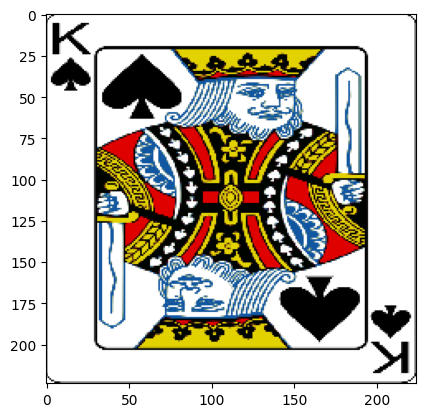

In [ ]:
import keras
import matplotlib.pyplot as plt
img = keras.utils.load_img("king_of_spades.png", target_size=(224, 224))
plt.imshow(img)

#Taken as a example from keras documentation page "Image classfication from scratch"
img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% jack and {100 * score:.2f}% not jack.")